In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics


%cd /home/miri-o/Documents/
import biovec 
CDR3_cropped_model = biovec.models.load_protvec('CDR3_cropped_model')

/home/miri-o/Documents


In [4]:
#load a file containing CDR3s and their bio-physical and bio-chemical properties:

file_with_propeties = pd.read_csv('CDR3_properties_HCV.csv')
file_with_propeties.head()

,Unnamed: 0,X,Unnamed..0,index,Unnamed..0.1,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,...,VJL,CDR3_AA_LENGTH,CDR3_AA_GRAVY,CDR3_AA_BULK,CDR3_AA_ALIPHATIC,CDR3_AA_POLARITY,CDR3_AA_CHARGE,CDR3_AA_BASIC,CDR3_AA_ACIDIC,CDR3_AA_AROMATIC
0,1,0,0,0,0,AACTGTAAGATACACTA,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,True,True,False,...,IGHV4-39*IGHJ4*39,11,-0.554545,13.468182,0.445455,8.163636,-0.077262,0.090909,0.090909,0.181818
1,2,1,1,1,1,CTTATAGTCATTAAATA,AGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCAT...,True,True,False,...,IGHV3-30*IGHJ4*48,14,-1.771429,10.337143,0.071429,10.078571,-2.888734,0.142857,0.285714,0.142857
2,3,3,3,3,3,TGCCTTGGCCCTTATTT,GAGATCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCA...,True,True,False,...,IGHV3-11*IGHJ2*36,10,-0.680000,15.822000,0.490000,8.520000,-0.001375,0.200000,0.200000,0.300000
3,4,4,4,5,5,GATATTCGATATATAAT,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,True,True,False,...,IGHV3-23*IGHJ4*57,17,-0.764706,13.157059,0.458824,8.676471,-0.005748,0.117647,0.117647,0.235294
4,5,5,5,6,6,CTAATAAATCGTTATTA,GAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCA...,True,True,False,...,IGHV3-48*IGHJ4*54,16,-0.868750,14.255625,0.368750,8.506250,0.993936,0.125000,0.062500,0.250000


In [8]:
import re
subjects = file_with_propeties['SUBJECT']
print(subjects.unique())


array(['C7', 'C4', 'SC2', 'CI11', 'SC11', 'C8', 'C10', 'CI16', 'CI15',
       'CI26', 'SC15', 'CI13', 'CI20', 'SC14', 'CI21', 'C6', 'SC8', 'SC3',
       'SC9', 'SC7', 'CI22', 'CI10', 'SC1', 'SC10', 'C5', 'C9'], dtype=object)

In [13]:
file_with_propeties['CONDITION'] = [re.split('\d', condition)[0] for condition in file_with_propeties['SUBJECT']]
conditions = file_with_propeties['CONDITION'].unique()

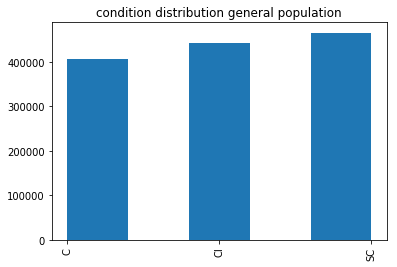

In [11]:
plt.hist(file_with_propeties['CONDITION'], bins = 5)
plt.xticks(rotation=90)
plt.title('condition distribution general population')
plt.show()

I would like to randomly choose 5k samples out of each condition, and work from there

In [12]:
sns.countplot(x = 'cluster', hue = 'condition', data = data)
plt.title('condition distribution between clusters')
plt.show()

NameError: name 'data' is not defined

In [53]:
import random
n = 5000
np.random.seed(1)
random_indexes = {}
random_indexes = random_indexes.fromkeys(conditions,0)
for condition in conditions:
    indexes = np.where(file_with_propeties['CONDITION']==condition)[0]
    random_indexes[condition] = np.random.choice(indexes,n)


In [55]:
pd.DataFrame(random_indexes)

,C,CI,SC
0,128037,411525,1168507
1,830125,465848,696433
2,1219623,431255,981950
3,1278825,184314,946099
4,73349,636236,861215
5,117583,766411,951255
6,21440,501048,955410
7,337756,617721,1161861
8,1308389,1089470,723390
9,856161,656667,240440


In [57]:
random_indexes.keys()

dict_keys(['C', 'SC', 'CI'])

(array([      0,       1,       2, ..., 1313270, 1313271, 1313272]),)

In [61]:
randvectors_word2vec = np.zeros((n*3,100))

index = 0
for condition in random_indexes.keys():
    for i in random_indexes[condition] :
        word = file_with_propeties.loc[i, ('JUNC_AA')]
        randvectors_word2vec[index] = list(CDR3_cropped_model.to_vecs(word)[0])
        index+=1


#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)

KeyError: 'Model has never trained this n-gram: CTC'